<a href="https://colab.research.google.com/github/m-njera/crop_disease/blob/master/nasnet_%26_resnet50_%26_densenet_169_201_161_121_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import pickle
import os
import glob
import pandas as pd
from google.colab import drive
import cv2
from PIL import Image
from pathlib import Path
import fastai

from fastai.vision import *
import torch
import torchvision.models as TorchModels

# create image data bunch
# create image data bunch

data = ImageDataBunch.from_folder('/content/drive/My Drive/crop', train="train/", test='lot/test/',
                              valid_pct=0.2,
                              ds_tfms=get_transforms(max_zoom=0.2,do_flip=True, flip_vert= True),
                              size=331, #331 resnet , 224 nasnetmobile, 331 xception
                              bs=16, 
                              #num_workers=os.cpu_count()
                             ).normalize(imagenet_stats)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])
#learn.fit_one_cycle(4)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.29E-06
Min loss divided by 10: 2.09E-06


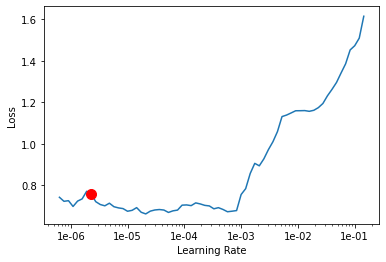

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=35, max_lr=slice(1e-4,1e-3), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='restnet35')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.792859,1.123855,0.451429,0.548571,01:26
1,1.615406,0.948903,0.360000,0.640000,01:23
2,1.405523,0.790590,0.331429,0.668571,01:23
3,1.229772,0.662872,0.251429,0.748571,01:25
4,1.082851,0.556669,0.234286,0.765714,01:26
5,0.979950,0.520807,0.182857,0.817143,01:25
6,0.930754,0.441923,0.160000,0.840000,01:26
7,0.869558,0.534446,0.194286,0.805714,01:25
8,0.788439,0.475399,0.154286,0.845714,01:24
9,0.707348,0.471896,0.154286,0.845714,01:24


Better model found at epoch 0 with accuracy value: 0.5485714077949524.
Better model found at epoch 1 with accuracy value: 0.6399999856948853.
Better model found at epoch 2 with accuracy value: 0.668571412563324.
Better model found at epoch 3 with accuracy value: 0.7485714554786682.
Better model found at epoch 4 with accuracy value: 0.7657142877578735.
Better model found at epoch 5 with accuracy value: 0.8171428442001343.
Better model found at epoch 6 with accuracy value: 0.8399999737739563.
Better model found at epoch 8 with accuracy value: 0.845714271068573.
Better model found at epoch 10 with accuracy value: 0.8571428656578064.
Better model found at epoch 12 with accuracy value: 0.8628571629524231.
Better model found at epoch 14 with accuracy value: 0.8742856979370117.
Better model found at epoch 22 with accuracy value: 0.8857142925262451.
Better model found at epoch 26 with accuracy value: 0.8914285898208618.


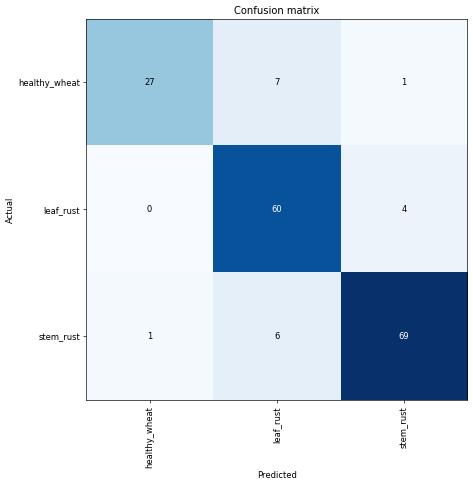

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.00E-05
Min loss divided by 10: 7.59E-08


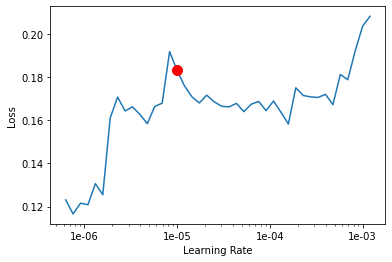

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=30, max_lr=slice(1e-6,1e-5), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet_final2')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.284628,0.385160,0.114286,0.885714,01:27
1,0.311239,0.376028,0.108571,0.891429,01:26
2,0.312532,0.371998,0.114286,0.885714,01:27
3,0.320778,0.388002,0.114286,0.885714,01:30
4,0.297181,0.397915,0.120000,0.880000,01:29
5,0.315587,0.359673,0.108571,0.891429,01:31
6,0.308360,0.394062,0.125714,0.874286,01:30
7,0.300031,0.365881,0.114286,0.885714,01:29
8,0.294996,0.390623,0.114286,0.885714,01:29
9,0.303731,0.366918,0.114286,0.885714,01:27


Better model found at epoch 0 with accuracy value: 0.8857142925262451.
Better model found at epoch 1 with accuracy value: 0.8914285898208618.
Better model found at epoch 17 with accuracy value: 0.8971428275108337.


In [0]:
!pip install pretrainedmodels

     |████████████████████████████████| 61kB 3.3MB/s 
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp36-none-any.whl size=60962 sha256=48e4b9f4b538844003c55a7a02de7a07ac3296b594e3a7d8d2226048ae2e2243
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built pretrainedmodels


In [0]:
from fastai.vision.models.cadene_models import nasnetamobile
from fastai.callbacks.tracker import *

In [0]:
learn = cnn_learner(data,nasnetamobile, metrics=[error_rate, accuracy], pretrained=True, path='/content/nasnet.pth', ps=0.5, callback_fns=ShowGraph)
#learn.fit_one_cycle(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 1.00E-04


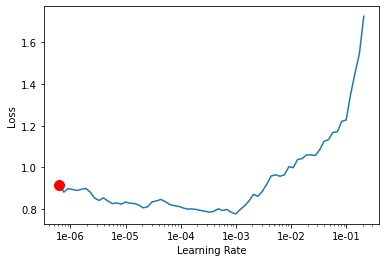

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.799857,1.459266,0.501901,0.498099,01:13
1,1.635846,1.148290,0.460076,0.539924,01:13
2,1.505387,1.297762,0.326996,0.673004,01:12
3,1.323141,1.006480,0.326996,0.673004,01:12
4,1.283056,1.594895,0.319392,0.680608,01:12
5,1.173275,0.715780,0.273764,0.726236,01:13
6,1.105183,0.807987,0.273764,0.726236,01:14
7,0.995748,0.829770,0.288973,0.711027,01:13
8,0.927951,0.987577,0.315589,0.684411,01:13
9,0.905670,0.767564,0.262357,0.737643,01:13


ERROR! Session/line number was not unique in database. History logging moved to new session 64


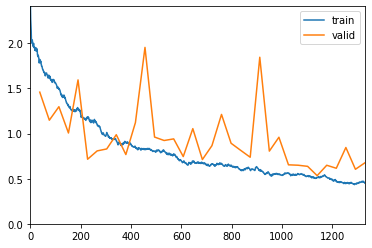

Better model found at epoch 0 with accuracy value: 0.49809885025024414.
Better model found at epoch 1 with accuracy value: 0.5399239659309387.
Better model found at epoch 2 with accuracy value: 0.6730037927627563.
Better model found at epoch 4 with accuracy value: 0.6806083917617798.
Better model found at epoch 5 with accuracy value: 0.7262357473373413.
Better model found at epoch 9 with accuracy value: 0.7376425862312317.
Better model found at epoch 13 with accuracy value: 0.7528517246246338.
Better model found at epoch 14 with accuracy value: 0.7794677019119263.
Better model found at epoch 20 with accuracy value: 0.7870722413063049.
Better model found at epoch 21 with accuracy value: 0.7908745408058167.
Better model found at epoch 22 with accuracy value: 0.802281379699707.
Better model found at epoch 24 with accuracy value: 0.8174905180931091.
Better model found at epoch 25 with accuracy value: 0.8250950574874878.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
#learn.unfreeze
learn.fit_one_cycle(cyc_len=35, callbacks=[SaveModelCallback(learn, monitor='accuracy', name='nasnet_final')])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.10E-06
Min loss divided by 10: 4.79E-05


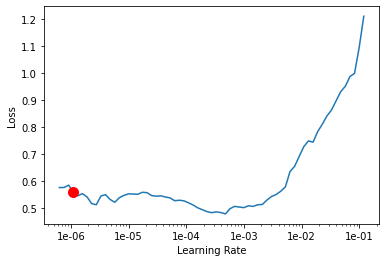

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.542565,1.510026,0.190114,0.809886,01:15
1,0.542131,1.130683,0.178707,0.821293,01:15
2,0.535470,1.465481,0.174905,0.825095,01:14
3,0.521416,1.386571,0.159696,0.840304,01:13
4,0.550673,0.796397,0.163498,0.836502,01:13
5,0.530982,2.022040,0.190114,0.809886,01:14
6,0.505930,0.720618,0.163498,0.836502,01:13
7,0.517650,1.178123,0.190114,0.809886,01:12
8,0.507424,0.955967,0.178707,0.821293,01:13
9,0.526239,1.437931,0.186312,0.813688,01:12


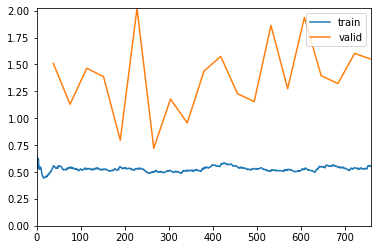

Better model found at epoch 0 with accuracy value: 0.8098859190940857.
Better model found at epoch 1 with accuracy value: 0.8212927579879761.
Better model found at epoch 2 with accuracy value: 0.8250950574874878.
Better model found at epoch 3 with accuracy value: 0.8403041958808899.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
learn.unfreeze
learn.fit_one_cycle(cyc_len=20, max_lr=slice(1e-6), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='nasnet_final2')])

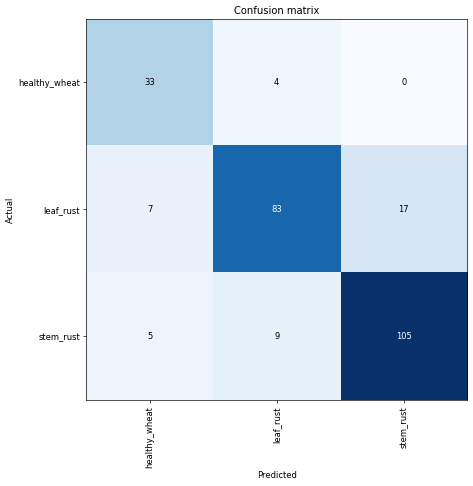

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

#Resnet50

In [0]:
from fastai.vision.models import resnet50

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.476832,1.004871,0.269962,0.730038,01:13
1,1.147689,0.771939,0.250951,0.749049,01:12
2,0.905988,0.511891,0.186312,0.813688,01:12
3,0.729808,0.501413,0.201521,0.798479,01:12


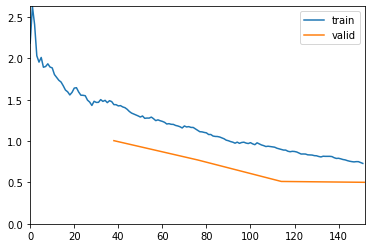

In [0]:
learn = cnn_learner(data,resnet50, metrics=[error_rate, accuracy], pretrained=True, ps=0.5, callback_fns=ShowGraph)
learn.fit_one_cycle(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 6.31E-08


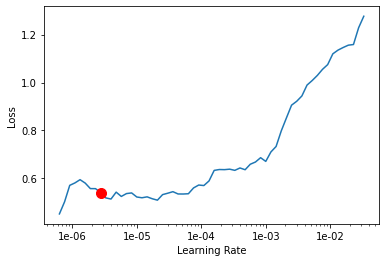

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.543714,0.469168,0.209125,0.790875,01:12
1,0.516426,0.484193,0.186312,0.813688,01:11
2,0.529515,0.458925,0.193916,0.806084,01:15
3,0.529435,0.425119,0.171103,0.828897,01:12
4,0.542105,0.441120,0.167300,0.832700,01:13
5,0.516690,0.437284,0.159696,0.840304,01:15
6,0.474673,0.415388,0.148289,0.851711,01:12
7,0.454155,0.340939,0.133080,0.866920,01:14
8,0.457797,0.358342,0.121673,0.878327,01:11
9,0.420331,0.344573,0.114068,0.885932,01:14


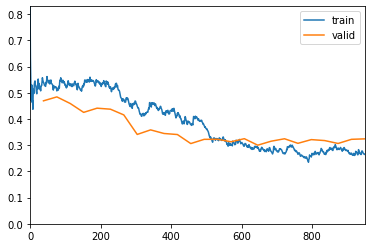

Better model found at epoch 0 with accuracy value: 0.7908745408058167.
Better model found at epoch 1 with accuracy value: 0.8136882185935974.
Better model found at epoch 3 with accuracy value: 0.8288973569869995.
Better model found at epoch 4 with accuracy value: 0.8326995968818665.
Better model found at epoch 5 with accuracy value: 0.8403041958808899.
Better model found at epoch 6 with accuracy value: 0.8517110347747803.
Better model found at epoch 7 with accuracy value: 0.8669201731681824.
Better model found at epoch 8 with accuracy value: 0.8783270120620728.
Better model found at epoch 9 with accuracy value: 0.8859315514564514.
Better model found at epoch 10 with accuracy value: 0.8935361504554749.
Better model found at epoch 12 with accuracy value: 0.9011406898498535.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=25, max_lr=slice(1e-4), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='xpection')])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 8.32E-06
Min loss divided by 10: 6.31E-08


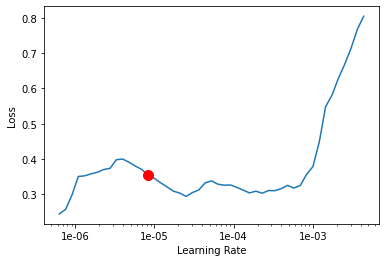

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.342605,0.311491,0.106464,0.893536,01:11
1,0.331182,0.320899,0.117871,0.882129,01:12
2,0.320038,0.306103,0.125475,0.874525,01:13
3,0.342431,0.324552,0.102662,0.897338,01:11
4,0.368367,0.306555,0.098859,0.901141,01:11
5,0.332429,0.318429,0.102662,0.897338,01:13
6,0.349717,0.324275,0.106464,0.893536,01:14


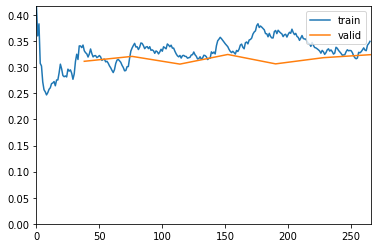

Better model found at epoch 0 with accuracy value: 0.8935361504554749.
Better model found at epoch 3 with accuracy value: 0.8973383903503418.
Better model found at epoch 4 with accuracy value: 0.9011406898498535.


In [0]:
learn.unfreeze
learn.fit_one_cycle(cyc_len=7, max_lr=slice(1e-5), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resnet50')])

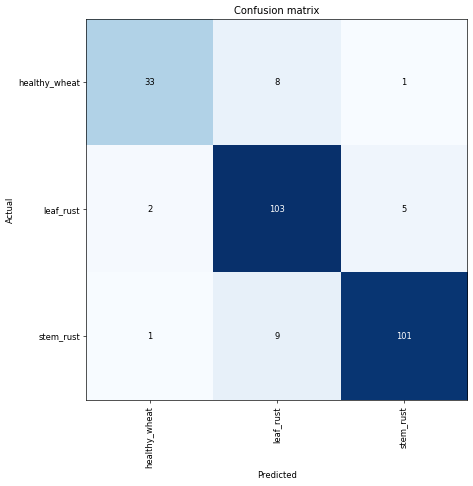

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

#DenseNet

In [0]:
from fastai.vision.models import densenet121

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/checkpoints/densenet121-a639ec97.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.321208,0.713926,0.273764,0.726236,03:23
1,1.082208,0.642151,0.209125,0.790875,01:15
2,0.872605,0.495842,0.201521,0.798479,01:16
3,0.683053,0.435348,0.178707,0.821293,01:18


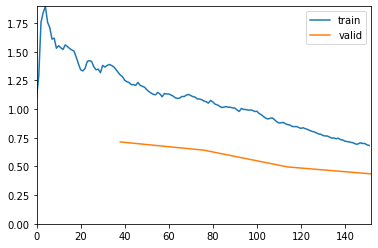

In [0]:
learn = cnn_learner(data,densenet121, metrics=[error_rate, accuracy], pretrained=True, ps=0.5, callback_fns=ShowGraph)
learn.fit_one_cycle(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.31E-07
Min loss divided by 10: 2.75E-07


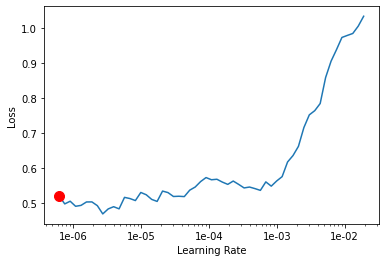

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.506045,0.373233,0.144487,0.855513,01:16
1,0.496351,0.333750,0.117871,0.882129,01:19
2,0.444256,0.491928,0.148289,0.851711,01:17
3,0.482517,0.526222,0.163498,0.836502,01:16
4,0.523010,0.675635,0.178707,0.821293,01:15
5,0.576758,0.573280,0.155894,0.844106,01:16
6,0.532752,0.647554,0.197719,0.802281,01:16
7,0.528059,0.513044,0.174905,0.825095,01:18
8,0.506258,0.332268,0.117871,0.882129,01:17
9,0.458624,0.298468,0.102662,0.897338,01:17


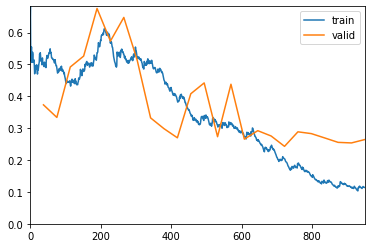

Better model found at epoch 0 with accuracy value: 0.855513334274292.
Better model found at epoch 1 with accuracy value: 0.8821292519569397.
Better model found at epoch 9 with accuracy value: 0.8973383903503418.
Better model found at epoch 10 with accuracy value: 0.9163498282432556.
Better model found at epoch 15 with accuracy value: 0.9239543676376343.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=25,wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet1')])

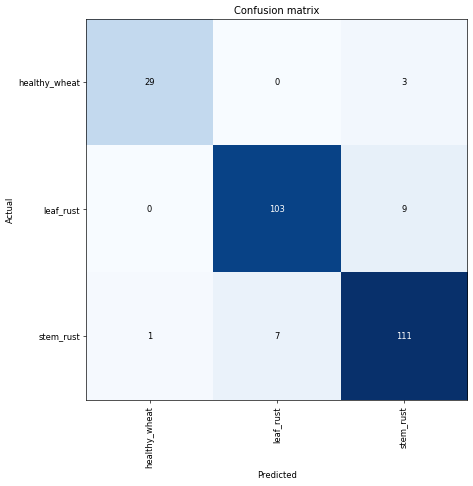

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 9.12E-07
Min loss divided by 10: 5.75E-05


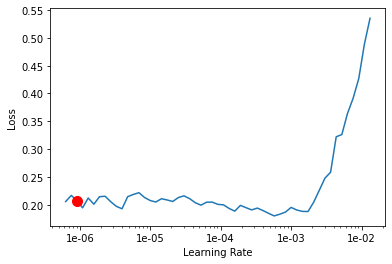

In [0]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(suggestion=True)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.196854,0.300827,0.083650,0.916350,01:19
1,0.175680,0.272167,0.079848,0.920152,01:16
2,0.195947,0.292014,0.087452,0.912548,01:16
3,0.224522,0.291225,0.083650,0.916350,01:20
4,0.228520,0.321882,0.098859,0.901141,01:16
5,0.266844,0.285101,0.087452,0.912548,01:15
6,0.243240,0.285537,0.079848,0.920152,01:17


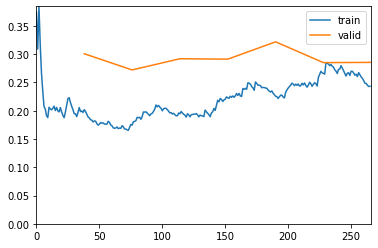

Better model found at epoch 0 with accuracy value: 0.9163498282432556.
Better model found at epoch 1 with accuracy value: 0.9201520681381226.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
learn.unfreeze
learn.fit_one_cycle(cyc_len=7, max_lr=slice(1e-6), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet2')])

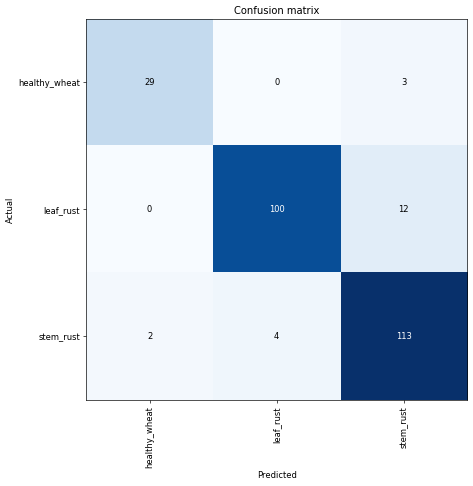

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

#DenseNet

In [0]:
from fastai.vision.models import densenet161

Downloading: "https://download.pytorch.org/models/densenet161-8d451a50.pth" to /root/.cache/torch/checkpoints/densenet161-8d451a50.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.504147,0.637484,0.186312,0.813688,01:32
1,1.213684,0.547455,0.197719,0.802281,01:14
2,0.936856,0.378748,0.121673,0.878327,01:17
3,0.717147,0.383111,0.133080,0.866920,01:15


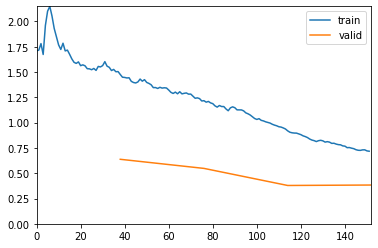

In [0]:
learn = cnn_learner(data,densenet161, metrics=[error_rate, accuracy], pretrained=True, ps=0.5, callback_fns=ShowGraph)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.482199,0.363102,0.140684,0.859316,01:14
1,0.477474,0.323492,0.098859,0.901141,01:15
2,0.495252,0.329297,0.091255,0.908745,01:15
3,0.478573,0.361933,0.106464,0.893536,01:16
4,0.489640,0.467763,0.129278,0.870722,01:18
5,0.505497,0.412727,0.136882,0.863118,01:16
6,0.507417,0.476991,0.155894,0.844106,01:17
7,0.473019,0.310329,0.106464,0.893536,01:16
8,0.435607,0.307507,0.095057,0.904943,01:18
9,0.401246,0.466133,0.155894,0.844106,01:16


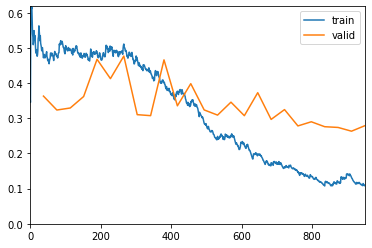

Better model found at epoch 0 with accuracy value: 0.8593155741691589.
Better model found at epoch 1 with accuracy value: 0.9011406898498535.
Better model found at epoch 2 with accuracy value: 0.9087452292442322.
Better model found at epoch 19 with accuracy value: 0.9125475287437439.
Better model found at epoch 20 with accuracy value: 0.9163498282432556.
Better model found at epoch 21 with accuracy value: 0.9239543676376343.


In [0]:
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=25,wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet161_1')])

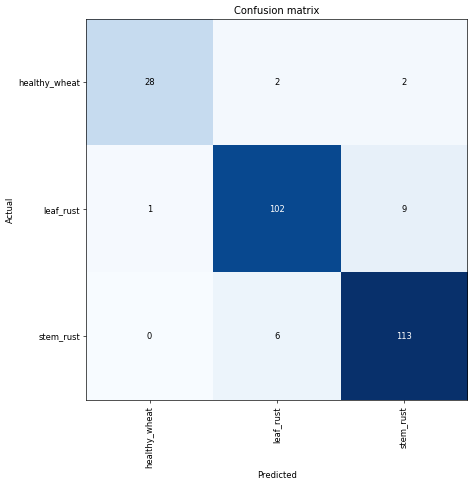

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.165663,0.282577,0.079848,0.920152,01:16
1,0.147567,0.272704,0.079848,0.920152,01:17
2,0.136689,0.262901,0.079848,0.920152,01:14
3,0.147438,0.272697,0.072243,0.927757,01:17
4,0.143130,0.267999,0.079848,0.920152,01:18
5,0.148492,0.287360,0.083650,0.916350,01:17
6,0.144242,0.272713,0.076046,0.923954,01:15


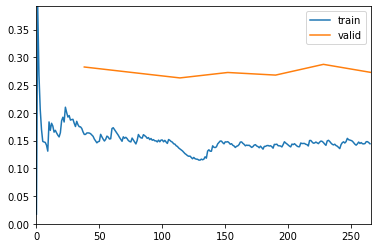

Better model found at epoch 0 with accuracy value: 0.9201520681381226.
Better model found at epoch 3 with accuracy value: 0.927756667137146.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
learn.unfreeze
learn.fit_one_cycle(cyc_len=7, max_lr=slice(1e-6), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet161_2')])

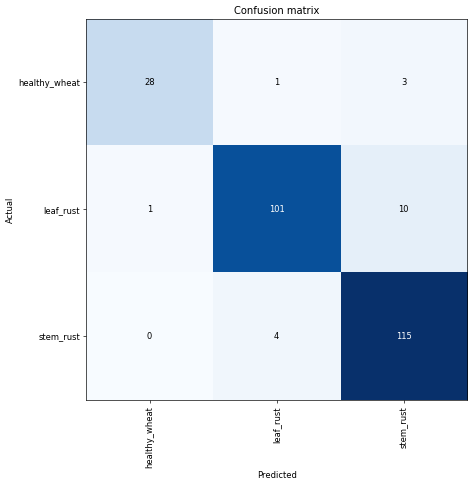

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
from fastai.vision.models import densenet169

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/checkpoints/densenet169-b2777c0a.pth


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.402901,0.704534,0.239544,0.760456,03:46
1,1.053590,0.636271,0.250951,0.749049,01:19
2,0.830379,0.367537,0.136882,0.863118,01:19
3,0.622426,0.403743,0.159696,0.840304,01:18


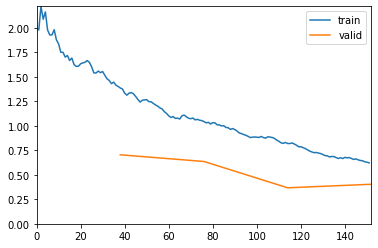

In [0]:
learn = cnn_learner(data,densenet169, metrics=[error_rate, accuracy], pretrained=True, ps=0.5, callback_fns=ShowGraph)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.456215,0.388965,0.136882,0.863118,01:17
1,0.482286,0.371260,0.140684,0.859316,01:16
2,0.514379,0.376889,0.133080,0.866920,01:15
3,0.510310,0.439246,0.144487,0.855513,01:16
4,0.502850,0.401785,0.125475,0.874525,01:16
5,0.460560,0.428866,0.155894,0.844106,01:15
6,0.489479,0.561936,0.167300,0.832700,01:16
7,0.459236,0.401193,0.140684,0.859316,01:17
8,0.430707,0.570717,0.167300,0.832700,01:18
9,0.412199,0.355210,0.110266,0.889734,01:17


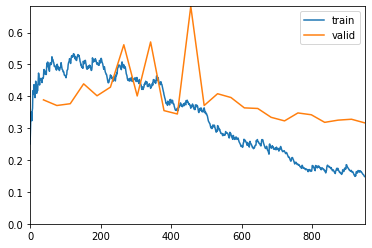

Better model found at epoch 0 with accuracy value: 0.8631178736686707.
Better model found at epoch 2 with accuracy value: 0.8669201731681824.
Better model found at epoch 4 with accuracy value: 0.874524712562561.
Better model found at epoch 9 with accuracy value: 0.8897338509559631.
Better model found at epoch 10 with accuracy value: 0.8935361504554749.
Better model found at epoch 15 with accuracy value: 0.9011406898498535.


In [0]:
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=25,wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet169_1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.197170,0.336040,0.106464,0.893536,01:17
1,0.223335,0.338034,0.117871,0.882129,01:18
2,0.202554,0.333179,0.110266,0.889734,01:16
3,0.193889,0.333797,0.114068,0.885932,01:17
4,0.184758,0.340443,0.106464,0.893536,01:16
5,0.183835,0.342456,0.110266,0.889734,01:18
6,0.198349,0.330409,0.098859,0.901141,01:19


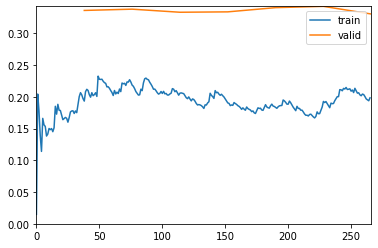

Better model found at epoch 0 with accuracy value: 0.8935361504554749.
Better model found at epoch 6 with accuracy value: 0.9011406898498535.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
learn.unfreeze
learn.fit_one_cycle(cyc_len=7, max_lr=slice(1e-6), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet169_2')])

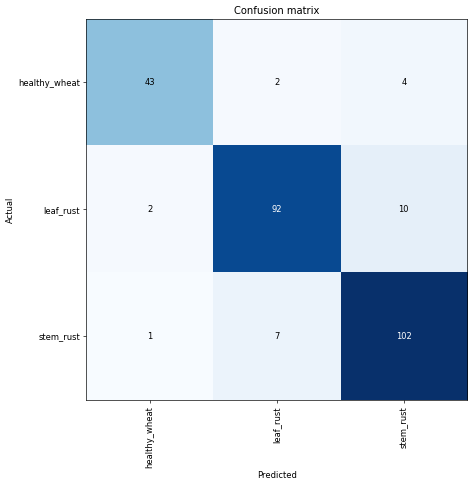

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
from fastai.vision.models import densenet201

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.532893,0.753417,0.220532,0.779468,01:19
1,1.169673,0.630566,0.220532,0.779468,01:17
2,0.851133,0.539095,0.167300,0.832700,01:15
3,0.705157,0.452547,0.152091,0.847909,01:16


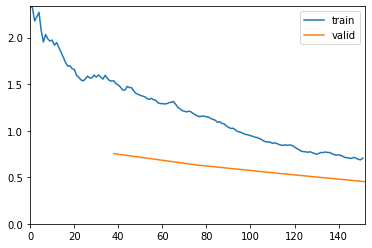

In [0]:
learn = cnn_learner(data,densenet201, metrics=[error_rate, accuracy], pretrained=True, ps=0.5, callback_fns=ShowGraph)
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.446567,0.435351,0.148289,0.851711,01:16
1,0.432382,0.403999,0.129278,0.870722,01:17
2,0.401069,0.417783,0.159696,0.840304,01:17
3,0.453117,0.424567,0.167300,0.832700,01:17
4,0.473188,0.530455,0.174905,0.825095,01:17
5,0.483556,0.785028,0.231939,0.768061,01:16
6,0.480702,0.559874,0.159696,0.840304,01:16
7,0.460016,0.456203,0.133080,0.866920,01:19
8,0.446733,0.425950,0.129278,0.870722,01:17
9,0.390564,0.376546,0.117871,0.882129,01:19


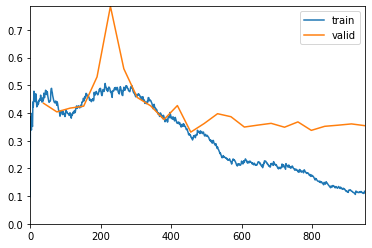

Better model found at epoch 0 with accuracy value: 0.8517110347747803.
Better model found at epoch 1 with accuracy value: 0.8707224130630493.
Better model found at epoch 9 with accuracy value: 0.8821292519569397.
Better model found at epoch 13 with accuracy value: 0.9011406898498535.
Better model found at epoch 24 with accuracy value: 0.9049429893493652.


In [0]:
from fastai.callbacks.tracker import *
learn.unfreeze
learn.fit_one_cycle(cyc_len=25,wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet2o1_1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.149287,0.351139,0.102662,0.897338,01:19
1,0.132787,0.358132,0.091255,0.908745,01:18
2,0.131943,0.356025,0.102662,0.897338,01:18
3,0.123788,0.342361,0.098859,0.901141,01:16
4,0.114767,0.345045,0.117871,0.882129,01:20


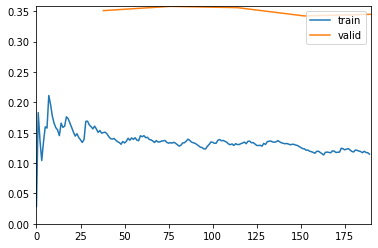

Better model found at epoch 0 with accuracy value: 0.8973383903503418.
Better model found at epoch 1 with accuracy value: 0.9087452292442322.


In [0]:
#learner_one_cycle.fit_one_cycle(cyc_len=35)
learn.unfreeze
learn.fit_one_cycle(cyc_len=5, max_lr=slice(1e-6), wd=0.01,callbacks=[SaveModelCallback(learn, monitor='accuracy', name='densenet201_2')])

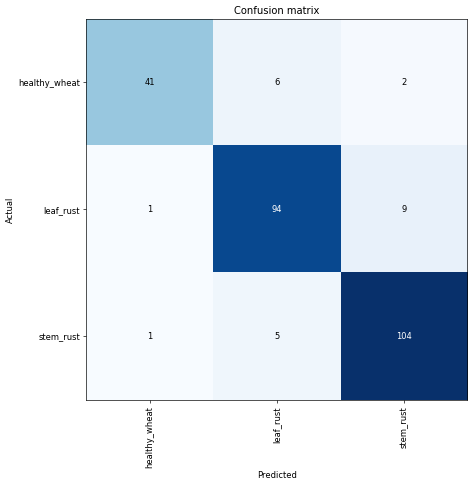

In [0]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(8,8), dpi=60)

In [0]:
import os
submission = pd.DataFrame({'ID': [s.split('.')[0] for s in os.listdir('/content/drive/My Drive/crop/lot/test')  if s.split('.')[1] != 'jfif']})
for i, c in enumerate(learn.data.classes):
  submission[c] = preds_test[:,i]
submission = submission[['ID', 'leaf_rust', 'stem_rust', 'healthy_wheat']] # Get same order as sample sub 
submission.head()

,ID,leaf_rust,stem_rust,healthy_wheat
0,AD54KD,0.735656,0.211893,0.052451
1,NN5F6I,0.998856,0.000605,0.000539
2,NGZ2X2,0.000130,0.998665,0.001205
3,OOALVQ,0.000797,0.997986,0.001217
4,3UZ447,0.001951,0.970782,0.027267


In [0]:
submission.to_csv('submission_go2.csv', index = False)